<a href="https://colab.research.google.com/github/GriseldaJusto/Analise---violencia-contra-lgbtqia/blob/main/Relat%C3%B3rio_de_Viol%C3%AAncia_contra_LGBTQIA%2B_(GGB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório de Violência contra LGBTQIA+ (Grupo Gay da Bahia)**
[![mata.jpg](https://i.postimg.cc/nLjXWWBZ/mata.jpg)](https://postimg.cc/67K62YM1)


##Importando bibliotecas

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Exibir todas as colunas e aumentar largura do display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Caminhos dos arquivos
caminhos_csv = {
    "Brasil": "/content/br_ggb_relatorio_lgbtqi_brasil.csv",
    "Local": "/content/br_ggb_relatorio_lgbtqi_local.csv",
    "Raça/Cor": "/content/br_ggb_relatorio_lgbtqi_raca_cor.csv",
    "Grupos": "/content/br_ggb_relatorio_lgbtqi_grupo_lgbtqia.csv"
}

# Função para carregar os arquivos
def carregar_csv(nome, caminho):
    if os.path.exists(caminho):
        print(f" {nome}: Arquivo encontrado e carregado.")
        return pd.read_csv(caminho)
    else:
        print(f" {nome}: Arquivo não encontrado em {caminho}. Verifique se ele foi enviado ao Colab.")
        return None

# Carregando os datasets
df_brasil = carregar_csv("Brasil", caminhos_csv["Brasil"])
df_local = carregar_csv("Local", caminhos_csv["Local"])
df_raca = carregar_csv("Raça/Cor", caminhos_csv["Raça/Cor"])
df_grupos = carregar_csv("Grupos", caminhos_csv["Grupos"])

# Verificação final
if any(df is None for df in [df_brasil, df_local, df_raca, df_grupos]):
    print("\n Alguns arquivos não foram carregados. O programa será encerrado.")
else:
    print("\n Todos os arquivos foram carregados com sucesso!")


 Brasil: Arquivo encontrado e carregado.
 Local: Arquivo encontrado e carregado.
 Raça/Cor: Arquivo encontrado e carregado.
 Grupos: Arquivo encontrado e carregado.

 Todos os arquivos foram carregados com sucesso!


## **Análise Exploratória de Dados**

### Carregamento e visão geral


## **Tabela df_brasil (Dados Nacionais do Brasil)**

In [139]:
print("\n" + "="*80)
print("📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_brasil (Dados Nacionais)")
print("="*80)

# Exibir primeiras linhas
print("\n Primeiras 5 linhas:")
display(df_brasil.head())


📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_brasil (Dados Nacionais)

 Primeiras 5 linhas:


,ano,homicidios
0,2000,130
1,2001,132
2,2002,126
3,2003,125
4,2004,158


In [140]:
# Exibir tipos de dados e contagem de não nulos
print("\n Tipos de Dados e Valores Não Nulos:")
print(df_brasil.info())


 Tipos de Dados e Valores Não Nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ano         20 non-null     int64
 1   homicidios  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes
None


In [141]:
# Estatísticas descritivas para colunas numéricas
print("\n Estatísticas Descritivas:")
display(df_brasil.describe(include='all'))


 Estatísticas Descritivas:


,ano,homicidios
count,20.00000,20.000000
mean,2009.50000,240.450000
std,5.91608,107.967088
min,2000.00000,112.000000
25%,2004.75000,134.250000
50%,2009.50000,229.500000
75%,2014.25000,329.000000
max,2019.00000,445.000000


In [142]:
# Contagem de valores ausentes por coluna
print("\n Contagem de Valores Ausentes (NaNs):")
print(df_brasil.isnull().sum())


 Contagem de Valores Ausentes (NaNs):
ano           0
homicidios    0
dtype: int64


In [143]:
# Lista de colunas disponíveis
print("\n Colunas disponíveis no DataFrame:")
print(df_brasil.columns.tolist())


 Colunas disponíveis no DataFrame:
['ano', 'homicidios']


In [144]:
# Verificar valores únicos da coluna 'ano' (se existir)
if 'ano' in df_brasil.columns:
    print("\nAnos disponíveis:")
    print(df_brasil['ano'].unique())


Anos disponíveis:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019]


In [145]:
# Valores únicos de identidade de gênero (se existir)
if 'identidade_genero' in df_brasil.columns:
    print("\n🔹 Identidades de Gênero presentes:")
    print(df_brasil['identidade_genero'].dropna().unique())

In [146]:
# Valores únicos de orientação sexual (se existir)
if 'orientacao_sexual' in df_brasil.columns:
    print("\n🔹 Orientações Sexuais presentes:")
    print(df_brasil['orientacao_sexual'].dropna().unique())

In [147]:
# Preencher NaNs na coluna homicidios, se existir
if 'homicidios' in df_brasil.columns:
    antes = df_brasil['homicidios'].isnull().sum()
    df_brasil['homicidios'].fillna(0)
    depois = df_brasil['homicidios'].isnull().sum()
    print(f"\nPreenchimento de NaNs na coluna 'homicidios': {antes} → {depois}")


Preenchimento de NaNs na coluna 'homicidios': 0 → 0


## **Tabela df_local (Dados por Localidade/Estado)**

In [148]:
print("\n" + "="*80)
print(" 📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_local (Dados por Localidade/Estado)")
print("="*80)

# Exibir primeiras linhas
print("\n Primeiras 5 linhas:")
display(df_local.head())


 📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_local (Dados por Localidade/Estado)

 Primeiras 5 linhas:


,ano,local,homicidios,prop_homicidios_total
0,2019,Residência,111,35.55
1,2019,Via Pública,71,21.58
2,2019,Matagal/Mata,12,4.27
3,2019,Bar,6,1.82
4,2019,Hotel/Motel,9,2.73


In [149]:
# Tipos de dados e contagem de valores não nulos
print("\nTipos de Dados e Valores Não Nulos:")
print("-"*80)
df_local.info()


Tipos de Dados e Valores Não Nulos:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano                    16 non-null     int64  
 1   local                  16 non-null     object 
 2   homicidios             16 non-null     int64  
 3   prop_homicidios_total  16 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 644.0+ bytes


In [150]:
# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
print("-"*80)
display(df_local.describe())


Estatísticas Descritivas:
--------------------------------------------------------------------------------


,ano,homicidios,prop_homicidios_total
count,16.0,16.000000,16.000000
mean,2019.0,20.062500,6.249375
std,0.0,30.946123,9.755329
min,2019.0,2.000000,0.610000
25%,2019.0,2.750000,0.842500
50%,2019.0,5.000000,1.515000
75%,2019.0,18.500000,6.090000
max,2019.0,111.000000,35.550000


In [151]:
# Contagem de valores ausentes
print("\nContagem de Valores Ausentes por Coluna:")
print("-"*80)
print(df_local.isnull().sum())


Contagem de Valores Ausentes por Coluna:
--------------------------------------------------------------------------------
ano                      0
local                    0
homicidios               0
prop_homicidios_total    0
dtype: int64


In [152]:
# Listar colunas disponíveis
print("\nColunas disponíveis no DataFrame:")
print("-"*80)
print(df_local.columns.tolist())


Colunas disponíveis no DataFrame:
--------------------------------------------------------------------------------
['ano', 'local', 'homicidios', 'prop_homicidios_total']


In [174]:
# Verificação de anos e localidades únicas
if 'ano' in df_local.columns:
    print("\nAnos disponíveis no DataFrame:")
    print("-"*80)
    print(df_local['ano'].unique())

if 'localidade' in df_local.columns:  # Assumindo que 'localidade' é a coluna de estado/região
    print("\nLocalidades com mais registros (top 10):")
    print("-"*80)
    print(df_local['localidade'].value_counts().head(10))

# Tratamento de valores ausentes na coluna 'homicidios'
if 'homicidios' in df_local.columns:
    df_local['homicidios'].fillna(0)
    print("\nTratamento de valores ausentes na coluna 'homicidios':")
    print("-"*80)
    print(f"NaNs preenchidos com 0. Total de NaNs restantes: {df_local['homicidios'].isnull().sum()}")


Anos disponíveis no DataFrame:
--------------------------------------------------------------------------------
[2019]

Tratamento de valores ausentes na coluna 'homicidios':
--------------------------------------------------------------------------------
NaNs preenchidos com 0. Total de NaNs restantes: 0


## **Tabela df_raca (Dados por Raça/Cor)**

In [154]:
print("\n" + "="*80)
print("📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_raca (Dados por Raça/Cor)")
print("="*80)

# Exibir primeiras linhas
print("\nPrimeiras 5 linhas:")
display(df_raca.head())


📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_raca (Dados por Raça/Cor)

Primeiras 5 linhas:


,ano,raca_cor,homicidios,prop_homicidios_total
0,2019,Branca,121.0,36.78
1,2019,Parda,90.0,27.35
2,2019,Preta,32.0,9.73
3,2019,Não Identificado,86.0,26.14
4,2018,Branca,213.0,58.40


In [155]:
# Tipos de dados e contagem de valores não nulos
print("\nTipos de Dados e Valores Não Nulos:")
print("-"*80)
df_raca.info()


Tipos de Dados e Valores Não Nulos:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano                    36 non-null     int64  
 1   raca_cor               36 non-null     object 
 2   homicidios             23 non-null     float64
 3   prop_homicidios_total  23 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [156]:
# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
print("-"*80)
display(df_raca.describe())


Estatísticas Descritivas:
--------------------------------------------------------------------------------


,ano,homicidios,prop_homicidios_total
count,36.000000,23.000000,23.000000
mean,2015.000000,90.782609,26.871739
std,2.618615,59.347173,17.027940
min,2011.000000,8.000000,2.520000
25%,2013.000000,50.500000,13.900000
50%,2015.000000,85.000000,26.800000
75%,2017.000000,114.000000,33.040000
max,2019.000000,260.000000,72.500000


In [157]:
# Contagem de valores ausentes
print("\nContagem de Valores Ausentes por Coluna:")
print("-"*80)
print(df_raca.isnull().sum())



Contagem de Valores Ausentes por Coluna:
--------------------------------------------------------------------------------
ano                       0
raca_cor                  0
homicidios               13
prop_homicidios_total    13
dtype: int64


In [158]:
# Listar colunas disponíveis
print("\nColunas disponíveis no DataFrame:")
print("-"*80)
print(df_raca.columns.tolist())


Colunas disponíveis no DataFrame:
--------------------------------------------------------------------------------
['ano', 'raca_cor', 'homicidios', 'prop_homicidios_total']


In [175]:
# Verificação de anos e categorias de raça/cor
if 'ano' in df_raca.columns:
    print("\nAnos disponíveis no DataFrame:")
    print(df_raca['ano'].unique())
print("-"*80)
if 'raca_cor' in df_raca.columns:
    print("\nCategorias de Raça/Cor disponíveis no DataFrame:")
    print(df_raca['raca_cor'].unique())
print("-"*80)
# Tratamento de valores ausentes na coluna 'homicidios'
if 'homicidios' in df_raca.columns:
    df_raca['homicidios'].fillna(0)
    print("\nTratamento de valores ausentes na coluna 'homicidios':")
    print(f"NaNs preenchidos com 0. Total de NaNs restantes: {df_raca['homicidios'].isnull().sum()}")


Anos disponíveis no DataFrame:
[2019 2018 2017 2016 2015 2014 2013 2012 2011]
--------------------------------------------------------------------------------

Categorias de Raça/Cor disponíveis no DataFrame:
['Branca' 'Parda' 'Preta' 'Não Identificado']
--------------------------------------------------------------------------------

Tratamento de valores ausentes na coluna 'homicidios':
NaNs preenchidos com 0. Total de NaNs restantes: 0


## **Tabela df_grupos (Dados por grupos lgbtqia)**

In [160]:
print("\n" + "="*80)
print("📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_grupos")
print("="*80)

# Exibir primeiras linhas
print("\n Primeiras 5 linhas:")
display(df_grupos.head())


📊 INFORMAÇÕES GERAIS DO DATAFRAME: df_grupos

 Primeiras 5 linhas:


,ano,grupo,homicidios,prop_homicidios_total
0,2020,Gay,51.0,NaN
1,2020,Trans ou Travesti,164.0,NaN
2,2020,Travesti,NaN,NaN
3,2020,Lésbica,10.0,NaN
4,2020,Transsexual,NaN,NaN


In [161]:
# Exibir tipos de dados e contagem de não nulos
print("\n Tipos de Dados e Valores Não Nulos:")
print(df_grupos.info())


 Tipos de Dados e Valores Não Nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano                    60 non-null     int64  
 1   grupo                  60 non-null     object 
 2   homicidios             39 non-null     float64
 3   prop_homicidios_total  22 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB
None


In [162]:
# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
print("-"*80)
display(df_grupos.describe())


Estatísticas Descritivas:
--------------------------------------------------------------------------------


,ano,homicidios,prop_homicidios_total
count,60.00000,39.000000,22.000000
mean,2015.50000,82.153846,24.717273
std,2.89652,73.872414,19.306752
min,2011.00000,0.000000,0.900000
25%,2013.00000,9.000000,9.032500
50%,2015.50000,52.000000,21.525000
75%,2018.00000,162.500000,42.425000
max,2020.00000,194.000000,52.890000


In [163]:
# Contagem de valores ausentes
print("\nContagem de Valores Ausentes por Coluna:")
print("-"*80)
print(df_grupos.isnull().sum())


Contagem de Valores Ausentes por Coluna:
--------------------------------------------------------------------------------
ano                       0
grupo                     0
homicidios               21
prop_homicidios_total    38
dtype: int64


In [164]:
# Lista de colunas disponíveis
print("\n Colunas disponíveis no DataFrame:")
print(df_grupos.columns.tolist())


 Colunas disponíveis no DataFrame:
['ano', 'grupo', 'homicidios', 'prop_homicidios_total']


In [176]:
# Verificar valores únicos da coluna 'ano' (se existir)
if 'ano' in df_grupos.columns:
    print("\nAnos disponíveis:")
    print(df_grupos['ano'].unique())

# Tratamento de valores ausentes na coluna 'homicidios'
if 'homicidios' in df_grupos.columns:
    df_grupos['homicidios'].fillna(0)
    print("\nTratamento de valores ausentes na coluna 'homicidios':")
    print(f"NaNs preenchidos com 0. Total de NaNs restantes: {df_grupos['homicidios'].isnull().sum()}")


Anos disponíveis:
[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011]

Tratamento de valores ausentes na coluna 'homicidios':
NaNs preenchidos com 0. Total de NaNs restantes: 0


# **Visualizacoes Graficas**

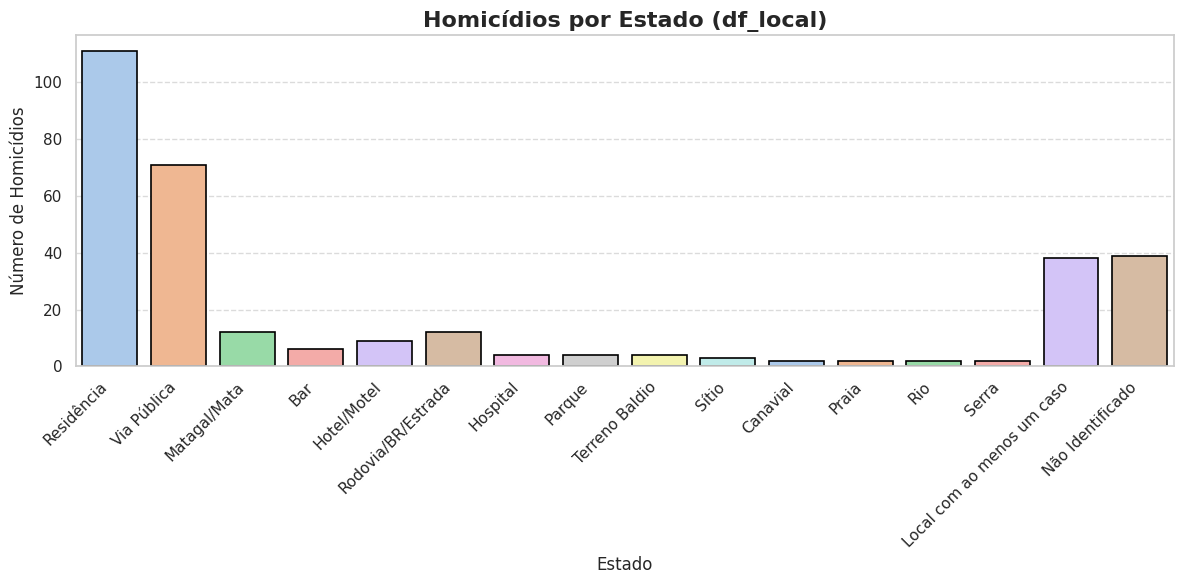

In [166]:
#Estados com maiores taxas de violência (df_local) (TOTAL E NAO UM TOP 10)
plt.figure(figsize=(12, 6))
num_categorias = df_local["local"].nunique()
paleta = sns.color_palette("pastel", n_colors=num_categorias)

ax = sns.barplot(
    data=df_local,
    x="local",
    y="homicidios",
    hue="local",
    palette=paleta,
    edgecolor="black",
    linewidth=1.2,
    errorbar=None,
    legend=False
)
plt.title("Homicídios por Estado (df_local)", fontsize=16, weight='bold')
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de Homicídios", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

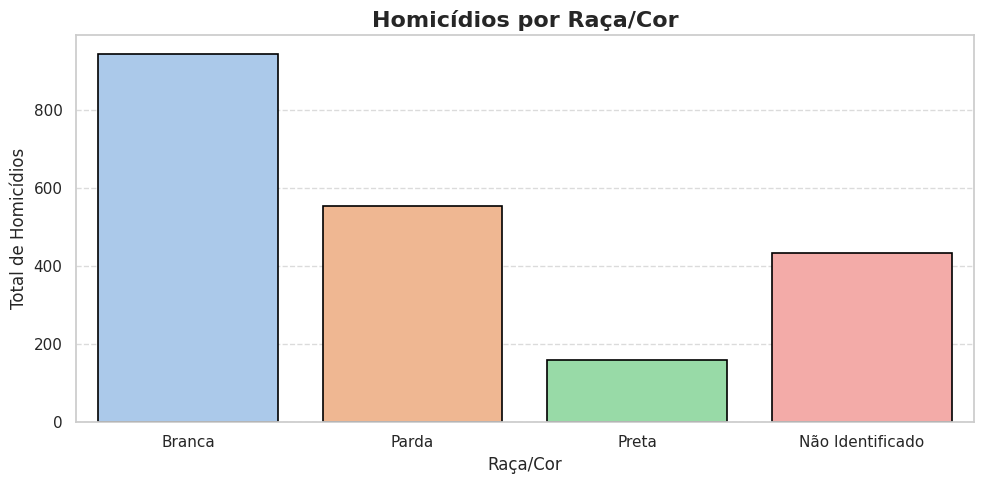

In [167]:
#Padrões por raça (df_raca)
plt.figure(figsize=(10, 5))
num_categorias = df_raca["raca_cor"].nunique()
paleta = sns.color_palette("pastel", n_colors=num_categorias)

ax = sns.barplot(
    data=df_raca,
    x="raca_cor",
    y="homicidios",
    estimator=sum,
    hue="raca_cor",
    palette=paleta,
    edgecolor="black",
    linewidth=1.2,
    errorbar=None,
    legend=False
)
plt.title("Homicídios por Raça/Cor", fontsize=16, weight='bold')
plt.xlabel("Raça/Cor", fontsize=12)
plt.ylabel("Total de Homicídios", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

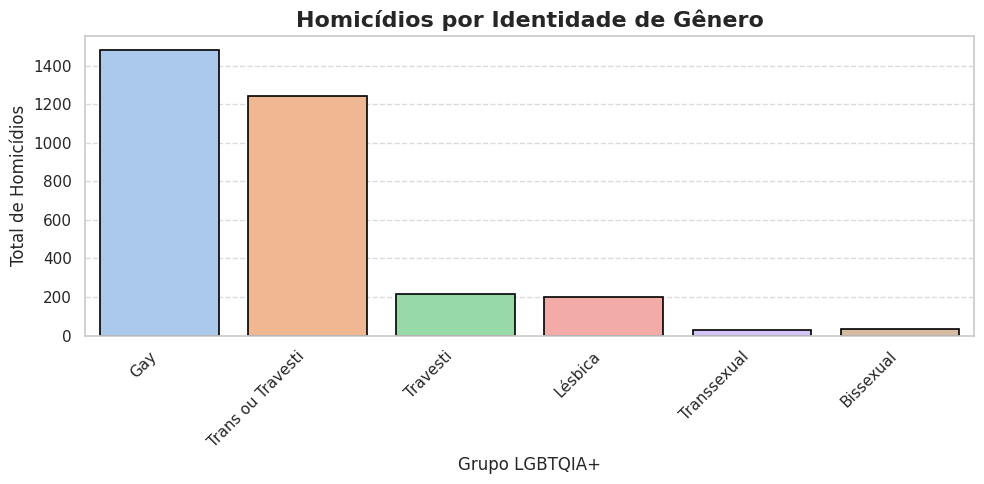

In [168]:
#Identidade de gênero (df_grupos)
plt.figure(figsize=(10, 5))
num_categorias = df_grupos["grupo"].nunique()
paleta = sns.color_palette("pastel", n_colors=num_categorias)

ax = sns.barplot(
    data=df_grupos,
    x="grupo",
    y="homicidios",
    estimator=sum,
    hue="grupo",
    palette=paleta,
    edgecolor="black",
    linewidth=1.2,
    errorbar=None,
    legend=False
)

plt.title("Homicídios por Identidade de Gênero", fontsize=16, weight='bold')
plt.xlabel("Grupo LGBTQIA+", fontsize=12)
plt.ylabel("Total de Homicídios", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## **Quais locais tem as maiores taxas de violência?**


 RESPOSTA À PERGUNTA 1: ESTADOS COM MAIORES TAXAS DE VIOLÊNCIA

Analisando dados do último ano disponível: 2019

Top 10 Locais com Mais Homicídios contra LGBTQIA+ (2019):


,Local,Homicídios
0,Residência,111
1,Via Pública,71
2,Não Identificado,39
3,Local com ao menos um caso,38
4,Matagal/Mata,12
5,Rodovia/BR/Estrada,12
6,Hotel/Motel,9
7,Bar,6
8,Hospital,4
9,Parque,4


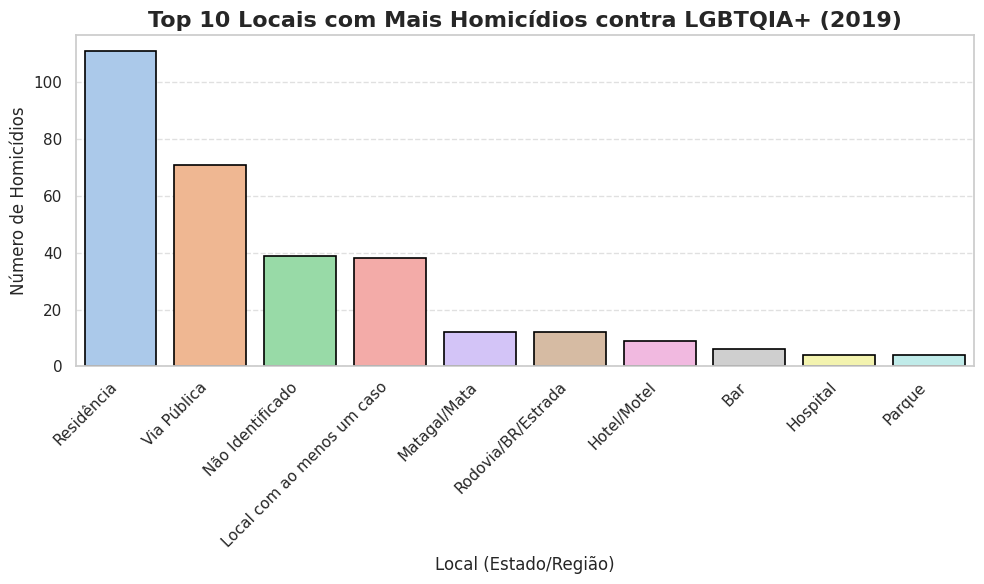

In [169]:
from IPython.display import display

print("\n" + "="*80)
print(" RESPOSTA À PERGUNTA 1: ESTADOS COM MAIORES TAXAS DE VIOLÊNCIA")
print("="*80)

# Precisamos das colunas 'local' (que representa o estado/região) e 'homicidios'.
if 'local' in df_local.columns and 'homicidios' in df_local.columns:

    if 'ano' in df_local.columns:
        ultimo_ano = df_local['ano'].max()
        print(f"\nAnalisando dados do último ano disponível: {ultimo_ano}")

        df_local_ultimo_ano = df_local[df_local['ano'] == ultimo_ano].copy()

        # Agrupar os dados por 'local' (estado) e somar os homicídios
        violencia_por_estado = df_local_ultimo_ano.groupby('local')['homicidios'].sum().sort_values(ascending=False)

        print(f"\nTop 10 Locais com Mais Homicídios contra LGBTQIA+ ({ultimo_ano}):")

        top10 = violencia_por_estado.head(10).reset_index()
        top10.columns = ['Local', 'Homicídios']

        display(top10.style.set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'left'), ('font-weight', 'bold')]},
            {'selector': 'td', 'props': [('text-align', 'left')]}
        ]).set_properties(**{
            'border': '1px solid #ccc',
            'padding': '8px'
        }))

        #grafico de barras
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=top10,
            x='Local',
            y='Homicídios',
            hue='Local',
            palette='pastel',
            edgecolor='black',
            linewidth=1.2,
            legend=False  # Remove legenda
        )

        plt.title(f'Top 10 Locais com Mais Homicídios contra LGBTQIA+ ({ultimo_ano})', fontsize=16, weight='bold')
        plt.xlabel('Local (Estado/Região)', fontsize=12)
        plt.ylabel('Número de Homicídios', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    else:
        print("\n[AVISO] A coluna 'ano' não foi encontrada no DataFrame. Realizando análise para todos os anos disponíveis:")

        violencia_por_estado_total = df_local.groupby('local')['homicidios'].sum().sort_values(ascending=False)

        print("\nTop 10 Locais com Mais Homicídios contra LGBTQIA+ (Todos os Anos):")
        print("-" * 80)

        top10_total = violencia_por_estado_total.head(10).reset_index()
        top10_total.columns = ['Local', 'Homicídios']

        display(top10_total.style.set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'left'), ('font-weight', 'bold')]},
            {'selector': 'td', 'props': [('text-align', 'left')]}
        ]).set_properties(**{
            'border': '1px solid #ccc',
            'padding': '8px'
        }))

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=top10_total,
            x='Local',
            y='Homicídios',
            hue='Local',
            palette='pastel',
            edgecolor='black',
            linewidth=1.2,
            legend=False
        )

        plt.title('Top 10 Locais com Mais Homicídios contra LGBTQIA+ (Todos os Anos)', fontsize=16, weight='bold')
        plt.xlabel('Local (Estado/Região)', fontsize=12)
        plt.ylabel('Número de Homicídios', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

else:
    print("\n[ERRO] As colunas 'local' ou 'homicidios' não foram encontradas no DataFrame.")
    print("Por favor, verifique os nomes das colunas no DataFrame 'df_local'.")


# **Há padrões sazonais ou demográficos?**


**Padrões Temporais (Tendências Anuais)**



--------------------------------------------------------------------------------
 RESPOSTA À PERGUNTA 2: PADRÕES TEMPORAIS (TENDÊNCIAS ANUAIS)
--------------------------------------------------------------------------------

Tabela: Total de Homicídios Contra LGBTQIA+ por Ano (Dados Nacionais)



,ano,homicidios
0,2000,130
1,2001,132
2,2002,126
3,2003,125
4,2004,158
5,2005,135
6,2006,112
7,2007,142
8,2008,187
9,2009,199


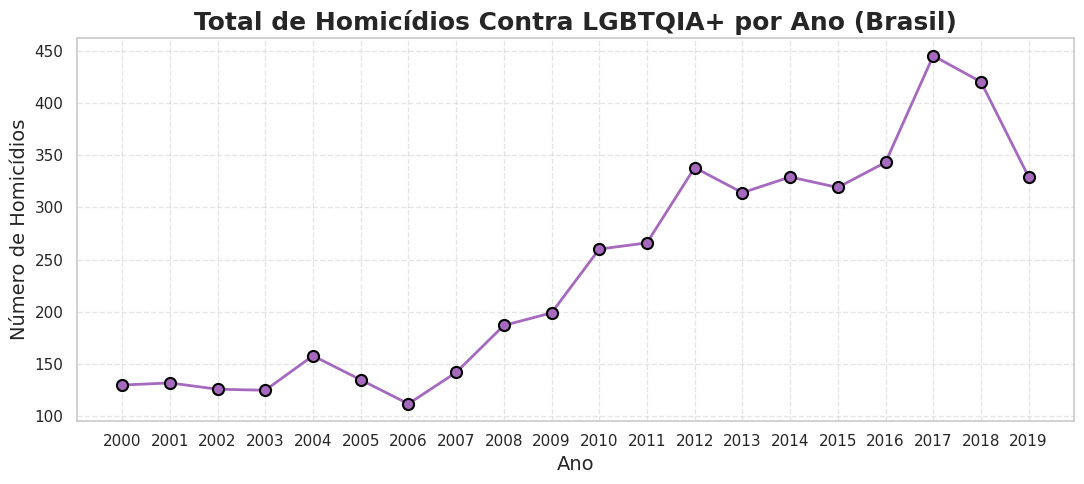

In [170]:
print("\n\n" + "-"*80)
print(" RESPOSTA À PERGUNTA 2: PADRÕES TEMPORAIS (TENDÊNCIAS ANUAIS)")
print("-"*80)

if 'ano' in df_brasil.columns and 'homicidios' in df_brasil.columns:
    homicidios_por_ano = df_brasil.groupby('ano')['homicidios'].sum().reset_index()

    print("\nTabela: Total de Homicídios Contra LGBTQIA+ por Ano (Dados Nacionais)\n")
    display(homicidios_por_ano.style.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('background-color', '#f2f2f2')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '6px')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#fafafa')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e6f2ff')]}
    ]).set_properties(**{
        'border': '1px solid #ccc',
        'border-collapse': 'collapse'
    }))

    plt.figure(figsize=(11, 5))
    sns.lineplot(
        data=homicidios_por_ano,
        x='ano',
        y='homicidios',
        marker='o',
        color='#a569bd',          # tom roxinho clarinho
        linewidth=2,
        markersize=8,
        markeredgecolor='black',  # contorno preto nos pontos
        markeredgewidth=1.5
    )
    plt.title('Total de Homicídios Contra LGBTQIA+ por Ano (Brasil)', fontsize=18, weight='bold')
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('Número de Homicídios', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(homicidios_por_ano['ano'].unique().astype(int))
    plt.tight_layout()
    plt.show()
else:
    print("❌ As colunas 'ano' ou 'homicidios' não foram encontradas em 'df_brasil'.")
    print("Não foi possível realizar a análise de tendências anuais.")


**Padrões Demográficos por Raça/cor**



--------------------------------------------------------------------------------
 RESPOSTA À PERGUNTA 2: PADRÕES DEMOGRÁFICOS POR RAÇA/COR
--------------------------------------------------------------------------------

Analisando padrões por Raça/Cor focando no último ano disponível: **2019**

Tabela: Homicídios Contra LGBTQIA+ por Raça/Cor (Dados do 2019)



,Raça/Cor,Homicídios
0,Branca,121
1,Parda,90
2,Não Identificado,86
3,Preta,32


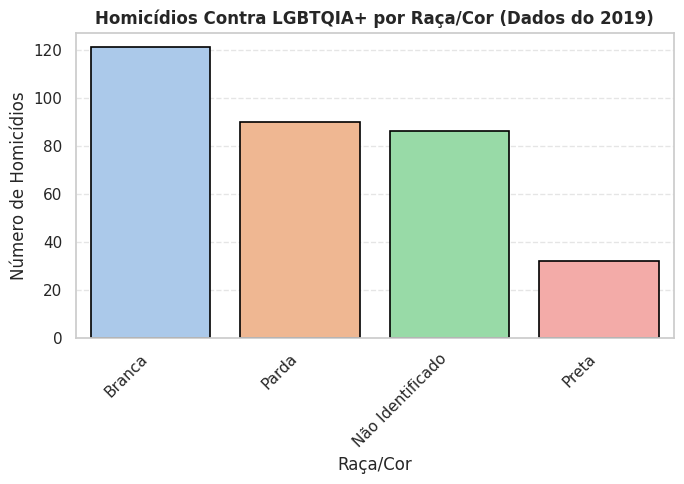


Tabela: Proporção de Homicídios no Total Nacional por Raça/Cor (Dados do 2019)



,Raça/Cor,Proporção
0,Branca,36.78
1,Parda,27.35
2,Não Identificado,26.14
3,Preta,9.73


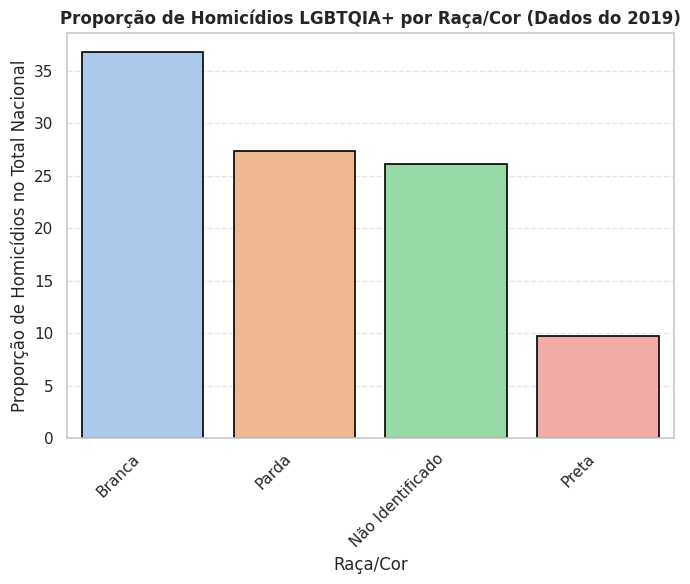

In [171]:
print("\n\n" + "-"*80)
print(" RESPOSTA À PERGUNTA 2: PADRÕES DEMOGRÁFICOS POR RAÇA/COR")
print("-"*80)

def formatar_valor(v):
    # Se valor é inteiro exibe sem decimal
    if isinstance(v, (int, float)):
        if v == int(v):
            return f"{int(v)}"
        else:
            #senao ele usa dois decimais
            return f"{v:.2f}"
    return v

if 'raca_cor' in df_raca.columns and 'homicidios' in df_raca.columns:

    # Verifica se existe a coluna 'ano' para analisar último ano ou todos os anos
    if 'ano' in df_raca.columns:
        ultimo_ano_raca = df_raca['ano'].max()
        df_raca_ultimo_ano = df_raca[df_raca['ano'] == ultimo_ano_raca].copy()
        print(f"\nAnalisando padrões por Raça/Cor focando no último ano disponível: **{ultimo_ano_raca}**")
        dados_para_raca = df_raca_ultimo_ano
        ano_texto = str(ultimo_ano_raca)
    else:
        print("\nColuna 'ano' não encontrada em 'df_raca'. Analisando Raça/Cor para todos os anos.")
        dados_para_raca = df_raca.copy()
        ano_texto = "todos os anos"

    # Agrupa dados para somar homicídios por raça/cor, ordenando decrescente
    violencia_por_raca = dados_para_raca.groupby('raca_cor')['homicidios'].sum().sort_values(ascending=False)

    print(f"\nTabela: Homicídios Contra LGBTQIA+ por Raça/Cor (Dados do {ano_texto})\n")
    display(
        violencia_por_raca.reset_index().rename(columns={'raca_cor':'Raça/Cor', 'homicidios':'Homicídios'})
        .style
        .format(formatar_valor)
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('background-color', '#f2f2f2')]},
            {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '6px')]},
            {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#fafafa')]},
            {'selector': 'tbody tr:hover', 'props': [('background-color', '#e6f2ff')]}
        ])
        .set_properties(**{'border': '1px solid #ccc', 'border-collapse': 'collapse'})
    )

    plt.figure(figsize=(7, 5))
    sns.barplot(
        x=violencia_por_raca.index,
        y=violencia_por_raca.values,
        hue=violencia_por_raca.index,
        palette='pastel',
        edgecolor='black',
        linewidth=1.2,
        dodge=False,
        legend=False
    )
    plt.title(f'Homicídios Contra LGBTQIA+ por Raça/Cor (Dados do {ano_texto})', fontsize=12, weight='bold')
    plt.xlabel('Raça/Cor', fontsize=12)
    plt.ylabel('Número de Homicídios', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Se disponível, mostra também proporção de homicídios por raça/cor
    if 'prop_homicidios_total' in df_raca.columns:
        proporcao_raca_cor = dados_para_raca.groupby('raca_cor')['prop_homicidios_total'].sum().sort_values(ascending=False)
        print(f"\nTabela: Proporção de Homicídios no Total Nacional por Raça/Cor (Dados do {ano_texto})\n")
        display(
            proporcao_raca_cor.reset_index().rename(columns={'raca_cor':'Raça/Cor', 'prop_homicidios_total':'Proporção'})
            .style
            .format(formatar_valor)
            .set_table_styles([
                {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('background-color', '#f2f2f2')]},
                {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '6px')]},
                {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#fafafa')]},
                {'selector': 'tbody tr:hover', 'props': [('background-color', '#e6f2ff')]}
            ])
            .set_properties(**{'border': '1px solid #ccc', 'border-collapse': 'collapse'})
        )

        plt.figure(figsize=(7, 6))
        sns.barplot(
            x=proporcao_raca_cor.index,
            y=proporcao_raca_cor.values,
            hue=proporcao_raca_cor.index,
            palette='pastel',
            edgecolor='black',
            linewidth=1.2,
            dodge=False,
            legend=False
        )
        plt.title(f'Proporção de Homicídios LGBTQIA+ por Raça/Cor (Dados do {ano_texto})', fontsize=12, weight='bold')
        plt.xlabel('Raça/Cor', fontsize=12)
        plt.ylabel('Proporção de Homicídios no Total Nacional', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

else:
    print("As colunas 'raca_cor' ou 'homicidios' não foram encontradas em 'df_raca'.")
    print("Não foi possível realizar a análise demográfica por raça/cor.")


# **Machine Learning**
**Aplicamos um modelo de machine learning para tentar prever o número de homicídios (variável alvo) a partir de atributos demográficos presentes no DataFrame df_raca**

In [172]:
# ---------------------------------------------------------------------
# Machine Learning - Previsão de Risco com base em atributos demográficos
# ---------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Dados do modelo: df_raca
df_ml = df_raca.copy()
df_ml = pd.get_dummies(df_ml, columns=["raca_cor"])
X = df_ml.drop(columns=["homicidios"])
y = df_ml["homicidios"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

erro_mae = mean_absolute_error(y_test, y_pred)
print(f"Erro médio absoluto (MAE): {erro_mae:.2f}")

Erro médio absoluto (MAE): 11.07


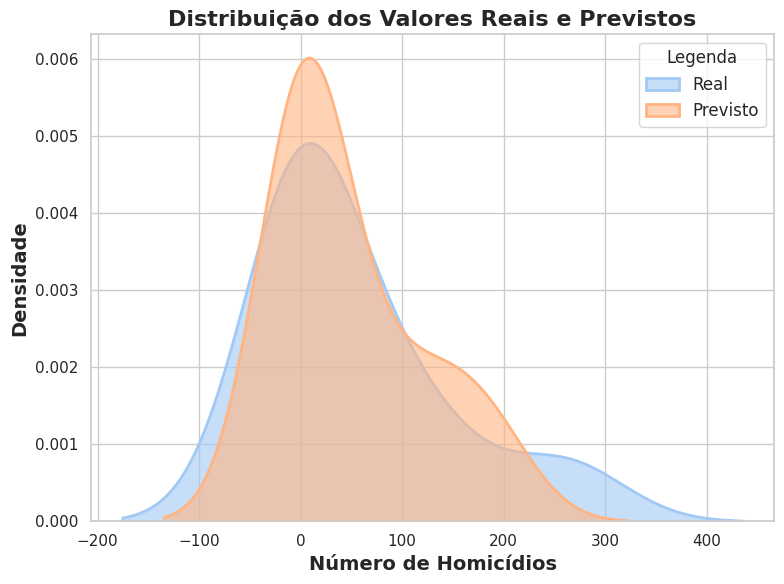

In [173]:
# Define um estilo claro e clean
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Paleta de cores suaves
cores = sns.color_palette("pastel")

# KDE plot com preenchimento e transparência para suavizar as cores
sns.kdeplot(y_test, label='Real', fill=True, color=cores[0], alpha=0.6, linewidth=2)
sns.kdeplot(y_pred, label='Previsto', fill=True, color=cores[1], alpha=0.6, linewidth=2)

plt.xlabel('Número de Homicídios', fontsize=14, weight='bold')
plt.ylabel('Densidade', fontsize=14, weight='bold')
plt.title('Distribuição dos Valores Reais e Previstos', fontsize=16, weight='bold')

plt.legend(title='Legenda', fontsize=12)
plt.tight_layout()
plt.show()
